In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"danielladitya","key":"8cf0d1b118ec4f3532c01d745996c210"}'}

In [ ]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d ash2703/handsignimages/

handsignimages.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! mkdir handsignimages
! unzip handsignimages.zip -d handsignimages

Streaming output truncated to the last 5000 lines.
  inflating: handsignimages/Train/U/25890_U.jpg  
  inflating: handsignimages/Train/U/25896_U.jpg  
  inflating: handsignimages/Train/U/2589_U.jpg  
  inflating: handsignimages/Train/U/25926_U.jpg  
  inflating: handsignimages/Train/U/25933_U.jpg  
  inflating: handsignimages/Train/U/25992_U.jpg  
  inflating: handsignimages/Train/U/26014_U.jpg  
  inflating: handsignimages/Train/U/26017_U.jpg  
  inflating: handsignimages/Train/U/26038_U.jpg  
  inflating: handsignimages/Train/U/26042_U.jpg  
  inflating: handsignimages/Train/U/26087_U.jpg  
  inflating: handsignimages/Train/U/26088_U.jpg  
  inflating: handsignimages/Train/U/2610_U.jpg  
  inflating: handsignimages/Train/U/26122_U.jpg  
  inflating: handsignimages/Train/U/26173_U.jpg  
  inflating: handsignimages/Train/U/2624_U.jpg  
  inflating: handsignimages/Train/U/26257_U.jpg  
  inflating: handsignimages/Train/U/26294_U.jpg  
  inflating: handsignimages/Train/U/26334_U.jpg  
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import string

import os

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_gen = train_datagen.flow_from_directory('/content/handsignimages/Train',
                                              target_size = (28, 28),
                                              batch_size = 128,
                                              class_mode = 'sparse',
                                              color_mode = 'grayscale',
                                              subset = 'training')
validation_gen = train_datagen.flow_from_directory('/content/handsignimages/Train',
                                              target_size = (28, 28),
                                              batch_size = 128,
                                              class_mode = 'sparse',
                                              color_mode = 'grayscale',
                                              subset = 'validation')
test_gen = test_datagen.flow_from_directory('/content/handsignimages/Test',
                                            target_size = (28, 28),
                                            batch_size = 128,
                                            class_mode = 'sparse',
                                            color_mode='grayscale')

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
classes = [char for char in string.ascii_uppercase if
           char != 'J' if char != 'Z']
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(10,10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis('off')
  plt.tight_layout()
  plt.show()

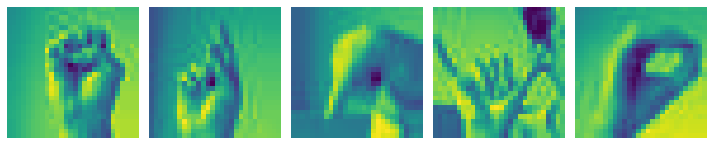

In [ ]:
sample_training_images, _= next(train_gen)
plotImages(sample_training_images[:5])

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(len(classes), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               2769152   
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 24)                6168      
Total params: 2,841,752
Trainable params: 2,841,752
Non-trainable params: 0
____________________________________________

In [ ]:
class cb(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('loss') < 0.004):
      print("Mencapai akurasi 99.6%, latihan dihentikan")
      self.model.stop_training = True

callback = cb()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer = RMSprop(learning_rate= 0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
hist = model.fit(train_gen,
                 epochs=20,
                 callbacks = [callback],
                 validation_data = validation_gen)

Epoch 1/20
172/172 [==============================] - 9s 50ms/step - loss: 0.0112 - accuracy: 0.9988 - val_loss: 2.9190e-04 - val_accuracy: 1.0000
Epoch 2/20
172/172 [==============================] - 8s 49ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 9.0110e-05 - val_accuracy: 1.0000
Mencapai akurasi 99.6%, latihan dihentikan


In [ ]:
results = model.evaluate(test_gen)

57/57 [==============================] - 2s 37ms/step - loss: 1.2051 - accuracy: 0.8518


Text(0.5, 1.0, 'Training and validation loss')

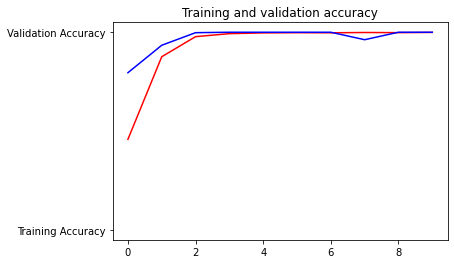

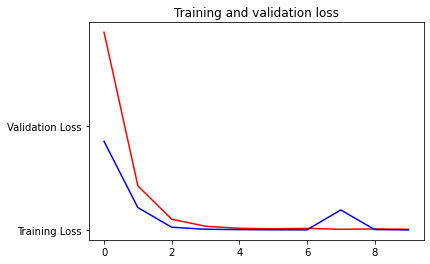

In [ ]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")

plt.title('Training and validation loss')

In [ ]:
from random import randint
import cv2 as cv

def testModel(alphabet = "A"):
    dirname, _, filenames = list(os.walk(f'/content/handsignimages/Test/{alphabet.upper()}'))[0]
    img_path = os.path.join(dirname, filenames[randint(0, len(filenames))])
    print(img_path)
    img = cv.imread(img_path, 0).reshape(1, 28, 28, 1)
    pred = model.predict(img)
    pred_label = classes[np.argmax(pred)]

    plt.title(pred_label)
    plt.imshow(img[0,:,:,0], cmap = "gray")

/content/handsignimages/Test/D/4282_D.jpg


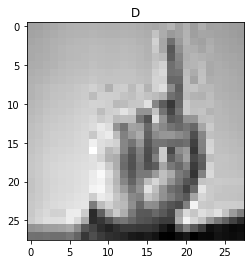

In [ ]:
testModel('D')

/content/handsignimages/Test/A/309_A.jpg


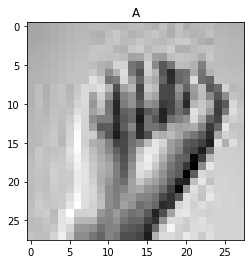

In [ ]:
testModel('A')


/content/handsignimages/Test/N/1444_N.jpg


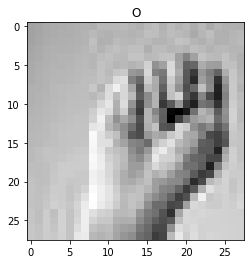

In [ ]:
testModel('N')

/content/handsignimages/Test/I/5515_I.jpg


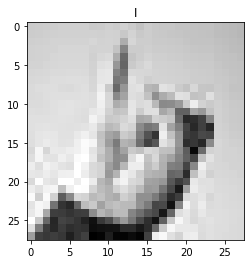

In [ ]:
testModel('I')

/content/handsignimages/Test/E/769_E.jpg


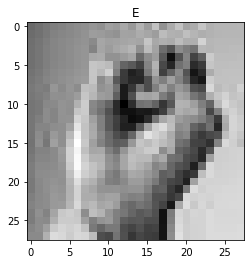

In [ ]:
testModel('E')

/content/handsignimages/Test/L/1247_L.jpg


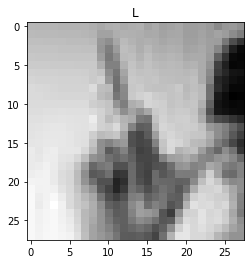

In [ ]:
testModel('L')